In [8]:
'''
    Adarsh Anand 
    Scraping data from the top 100 cryptocurrencies website 
    and doing some basic analysis on the data
'''

import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://coinmarketcap.com/"

result = requests.get(url).text
doc = BeautifulSoup(result, "html.parser")
# print(doc)

In [9]:
tbody = doc.find("tbody") # find the tbody
trs = tbody.contents # find the contents of the tbody
# print(trs[:10])

In [10]:
prices = {}
for tr in trs[:10]:
    name , price = tr.contents[2:4]
    
    # Extract the name from the website
    name = name.text
    temp = ""
    for char in name:
        if char.isalpha():
            temp += char
        else:
            break
    name = temp

    print(name,price.text)
    prices[name] = price.text

# sort in decreasing order
sorted_prices = sorted(prices.items(), key=lambda x: x[1], reverse=True)
print(sorted_prices)
print(prices)

Bitcoin $37,427.78
Ethereum $2,459.51
Tether $1.00
BNB $380.64
USD $1.00
Cardano $1.05
Solana $94.69
XRP $0.6232
Terra $62.91
Dogecoin $0.1442
[('Solana', '$94.69'), ('Terra', '$62.91'), ('BNB', '$380.64'), ('Bitcoin', '$37,427.78'), ('Ethereum', '$2,459.51'), ('Cardano', '$1.05'), ('Tether', '$1.00'), ('USD', '$1.00'), ('XRP', '$0.6232'), ('Dogecoin', '$0.1442')]
{'Bitcoin': '$37,427.78', 'Ethereum': '$2,459.51', 'Tether': '$1.00', 'BNB': '$380.64', 'USD': '$1.00', 'Cardano': '$1.05', 'Solana': '$94.69', 'XRP': '$0.6232', 'Terra': '$62.91', 'Dogecoin': '$0.1442'}


Name                 Price               
----                 ----                
Dogecoin             $0.1442             
XRP                  $0.6232             
USD                  $1.00               
Tether               $1.00               
Cardano              $1.05               
Ethereum             $2,459.51           
Bitcoin              $37,427.78          
BNB                  $380.64             
Terra                $62.91              
Solana               $94.69              


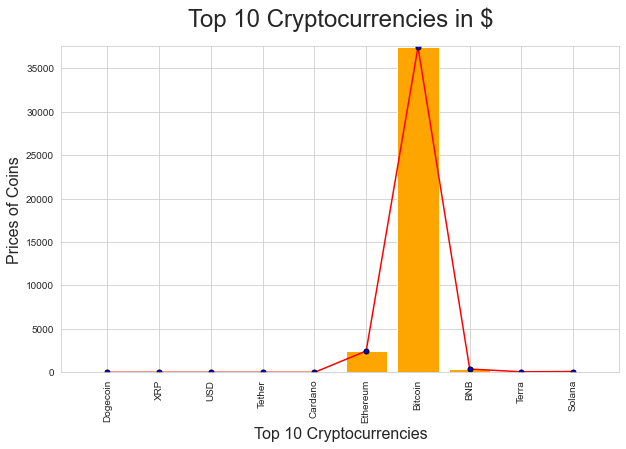

In [11]:
# plot graph of top 10 coins
reversed_prices = dict(reversed(sorted_prices))

# Display the reversed_prices in a table
print("{:<20} {:<20}".format("Name", "Price"))
print("{:<20} {:<20}".format("----", "----"))
for name, price in reversed_prices.items():
    print("{:<20} {:<20}".format(name, price))

plt.figure(figsize=(10,6))
x = reversed_prices.keys()
y = []

for item in reversed_prices.values():
    temp = item.replace("$","") # remove the $ sign
    temp = temp.replace(",","") # remove the , sign
    y.append(float(temp))

# Give a title to the graph
plt.title("Top 10 Cryptocurrencies in $", fontsize=24,pad=20)
# name the x axis
plt.xlabel("Top 10 Cryptocurrencies",fontdict={"fontsize":16})
# name the y axis
plt.ylabel("Prices of Coins",fontdict={"fontsize":16})

# Rotate the x axis labels
plt.xticks(rotation=90)

# Resize y axis
plt.ylim(0,max(y)+100)

# Change the bar colour to orange
plt.bar(x,y,color="orange")

# Show a line graph
plt.plot(x,y,data=None,color='red',linestyle='-',marker='o',markersize=5,markerfacecolor='blue',markeredgecolor='black',markeredgewidth=1)

plt.show()

<AxesSubplot:>

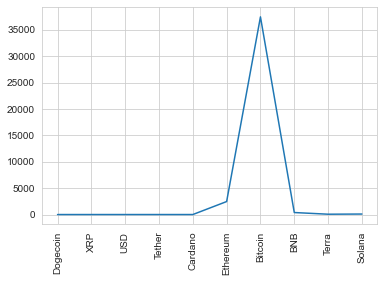

In [12]:
sns.set_style("whitegrid")
plt.xticks(rotation=90)
sns.lineplot(x=x,y=y)